# Image segmentation with K-means
In this notebook we will experiment with the k-means algorithm for image segmentation based on color similarity. The goal is to cluster the image pixels according to their color. We can visualize the pixels as points in a 3-dimensional space (since the color is a 3-d vector). In order for distances between colors to be perceptually meaningful, we work in the CIELAB color space.

In [1641]:
%matplotlib inline
import matplotlib as mpl
import imageio
mpl.rcParams['figure.dpi']=100
import numpy as np
from imageio import imread
from skimage.transform import rescale
from skimage.color import rgb2lab, lab2rgb
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Load in an image, reshape it (to reduce the workload), and display it.

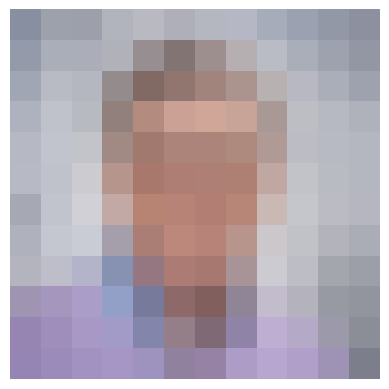

In [1642]:
image_raw = imageio.v2.imread('image_files/gates.jpg')
image_width = 12
image = rescale(image_raw, image_width/image_raw.shape[0], mode='reflect', channel_axis=2, anti_aliasing=True)
shape = image.shape
plt.figure()
plt.imshow(image)
plt.axis('off');

In [1643]:
rgb2lab(image).reshape(-1,3).shape

(144, 3)

Display a scatter plot of the image pixels, colored by their actual pixel color

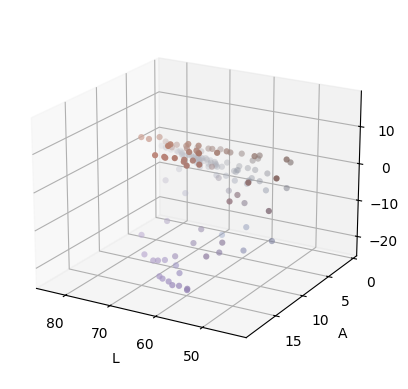

In [1644]:
# Enable this to be able to rotate the scatter plot
#%matplotlib notebook
X = rgb2lab(image).reshape(-1, 3)
plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=20., azim=120)
ax.set_xlabel("L")
ax.set_ylabel("A")
ax.set_zlabel("B")
image_c = [image.reshape(-1, 3)[i, :] for i in range(image.shape[0] * image.shape[1])]
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], marker='o', c=image_c, linewidths=0);

Cluster the image pixels, treating colors as 3-dimensional points

In [1645]:
# Define a plotting function
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
def plot_with_centers(X, y, centers):
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.view_init(elev=20., azim=120)
    ax.set_xlabel("L")
    ax.set_ylabel("A")
    ax.set_zlabel("B")
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=[colors[i % len(colors)] for i in y_kmeans], 
                 linewidths=0)
    ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], 
                 c=[colors[i % len(colors)] for i in range(K)], marker='+', s=200);

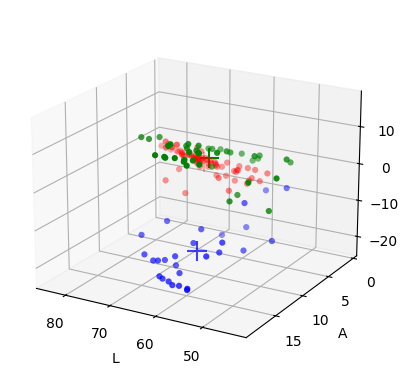

In [1646]:
def cluster_assignments(X, Y):
    return np.argmin(euclidean_distances(X,Y), axis=1)

K = 3
centers = np.array([X.mean(0) + (np.random.randn(3)/10) for _ in range(K)])
y_kmeans = cluster_assignments(X, centers)

# repeat estimation a number of times (could do something smarter, like comparing if clusters change)
for i in range(30):
    # assign each point to the closest center
    y_kmeans = cluster_assignments(X, centers)

    # move the centers to the mean of their assigned points (if any)
    for i, c in enumerate(centers):
        points = X[y_kmeans == i]
        if len(points):
            centers[i] = points.mean(0)

plot_with_centers(X, y_kmeans, centers)

In [1651]:
'''
a = [1,2,3,1,2,3,1,2,3]

'''
groups = []
for i in range(K):
	#groups.extend
	groups.append([i if (val == i) else K for val in y_kmeans])

#print(np.reshape(groups[1], (12,12)))
#print( lab2rgb(centers[y_kmeans,:])  )

In [1648]:
'''
print(groups[2])
print(centers)
#print(len(centers[groups[0],:]))

a =np.array( [[ 1,2,3],
 [ 4,5,6],])

b = np.array([0,1,0,0,1,0,0,1,0])
print("a:\n", a)
print("b:\n", b)
print("ab:\n", a[b, :])
print("ab squared:\n", a[b, :].reshape(3,3,3))
#print(centers[groups[0],:].reshape(12,12,3))
'''

'\nprint(groups[2])\nprint(centers)\n#print(len(centers[groups[0],:]))\n\na =np.array( [[ 1,2,3],\n [ 4,5,6],])\n\nb = np.array([0,1,0,0,1,0,0,1,0])\nprint("a:\n", a)\nprint("b:\n", b)\nprint("ab:\n", a[b, :])\nprint("ab squared:\n", a[b, :].reshape(3,3,3))\n#print(centers[groups[0],:].reshape(12,12,3))\n'

Plot the result as an image, where each pixel is colored by its cluster mean

[[ 73.05085086   1.62403281  -4.82875274]
 [ 58.48583171  12.24613719   8.69236969]
 [ 62.56843679  11.20378733 -17.83651372]
 [  0.           0.           0.        ]]
[[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3,

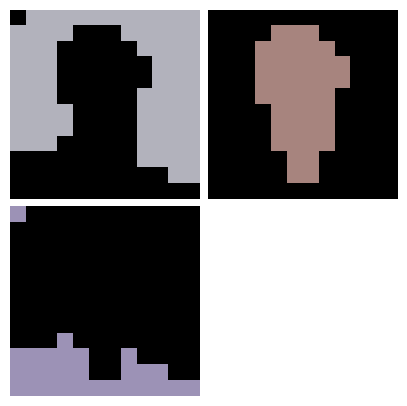

In [1649]:
fig = plt.figure(1)
fig.set_figwidth(6)
fig.set_figheight(4)

new_centers = np.concatenate((centers, [[0,0,0]]))

print(new_centers)
print(groups)

fig.add_subplot(2,3, 1)
plt.imshow(lab2rgb(new_centers[groups[0],:].reshape(shape[0], shape[1], 3)))
plt.axis('off');

fig.add_subplot(2,3,2)
plt.imshow(lab2rgb(new_centers[groups[1],:].reshape(shape[0], shape[1], 3)))
plt.axis('off');

fig.add_subplot(2,3, 4)
plt.imshow(lab2rgb(new_centers[groups[2],:].reshape(shape[0], shape[1], 3)))
plt.axis('off');

fig.tight_layout(pad=0.5)
#fig.show()

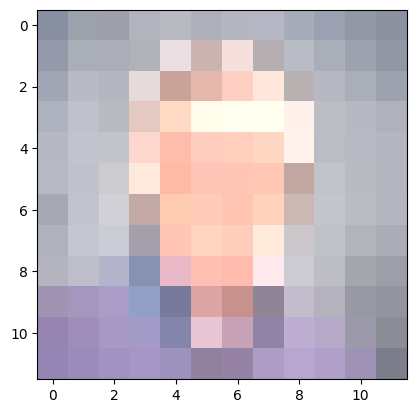

In [1650]:
plt.figure()
X[y_kmeans==1, :] = X[y_kmeans==1, :] *1.5
plt.imshow(lab2rgb(X.reshape(shape[0], shape[1], 3)))


$\star$ Experiment with increasing/decreasing the image resolution (image_width)

$\star$ Try out the different images **soccerball.jpg**, **roadsign.jpg**, **bananas.jpg**, **gates.jpg**

$\star$ Experiment with different values of K